## Assignment 01
#### G.K.M. Ishara Dilshan 
#### 200500L

question 1 and 2 (index = 200500L)

<StemContainer object of 3 artists>

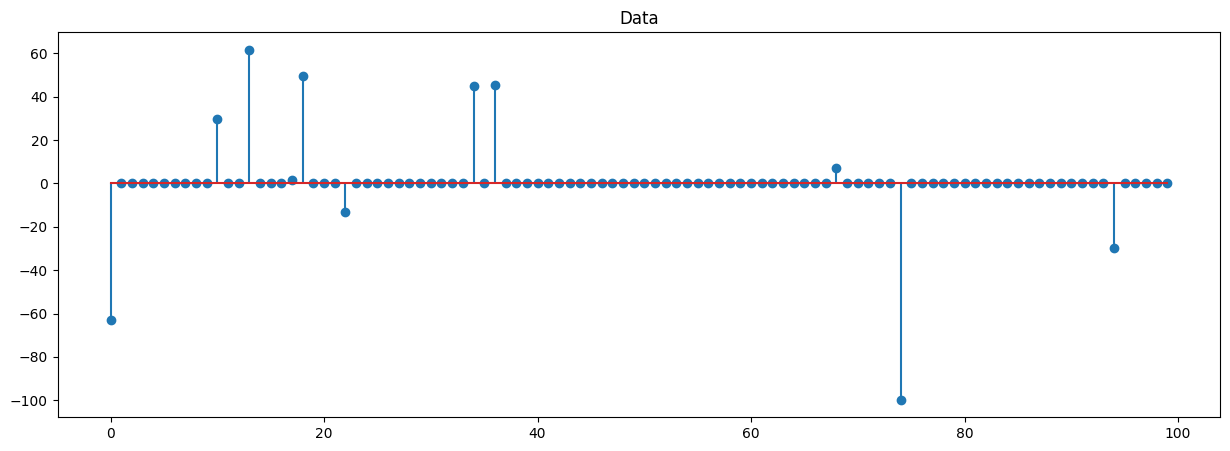

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    # generating a random signal with num_nonzero non-zero elements
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 50*np.random.randn(num_nonzero)  
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100  # Total length of the signal
num_nonzero = 10    # Number of non-zero elements in the signal
your_index_no=200500 # Enter without english letter and without leading zeros
signal = generate_signal(signal_length, num_nonzero)
signal[10] = (your_index_no % 10)*10 + 10
if  your_index_no % 10 == 0:
  signal[10] = np.random.randn(1) + 30

# Plotting the signal
signal=signal.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data")
plt.stem(signal)


### quiestion 03

In [10]:
def min_max_scale(data):
    min_val = np.min(data)
    max_val = np.max(data)
    print("min of data", min_val, "max of data", max_val)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

def meannorm(data):
    mean = np.mean(data)
    std = np.std(data)
    print("mean of data", mean, "std of data", std)
    normalized_data = (data - mean) / std
    return normalized_data


scaled_data_min_max = min_max_scale(signal)
scaled_data_mean_norm = meannorm(signal)

min of data -99.74731349246915 max of data 61.57082897086394
mean of data 0.34175454785447973 std of data 16.19075843901647


1.Import MaxAbsScaler and create an instance of it
2.Fit the scaler to your dataset and transform the data

Now, scaled_data contains your dataset after applying MaxAbsScaler. This scaler scales each feature by dividing it by the maximum absolute value of that feature, ensuring that the absolute values of all features lie within the range [-1, 1].

In [11]:
from sklearn.preprocessing import MaxAbsScaler
# Create an instance of MaxAbsScaler
sc = MaxAbsScaler()
# Fit the scaler to your data
sc.fit(signal)

# Transform the data using the scaler
scaled_data = sc.transform(signal)

#scaled_data = scaler.fit_transform(data) # fit and transform in one step

### quiestion 04

Visualize the data before and after normalization. Create stem plots of the original
and normalized data to visualize the effects of each normalization method on the
data.

<StemContainer object of 3 artists>

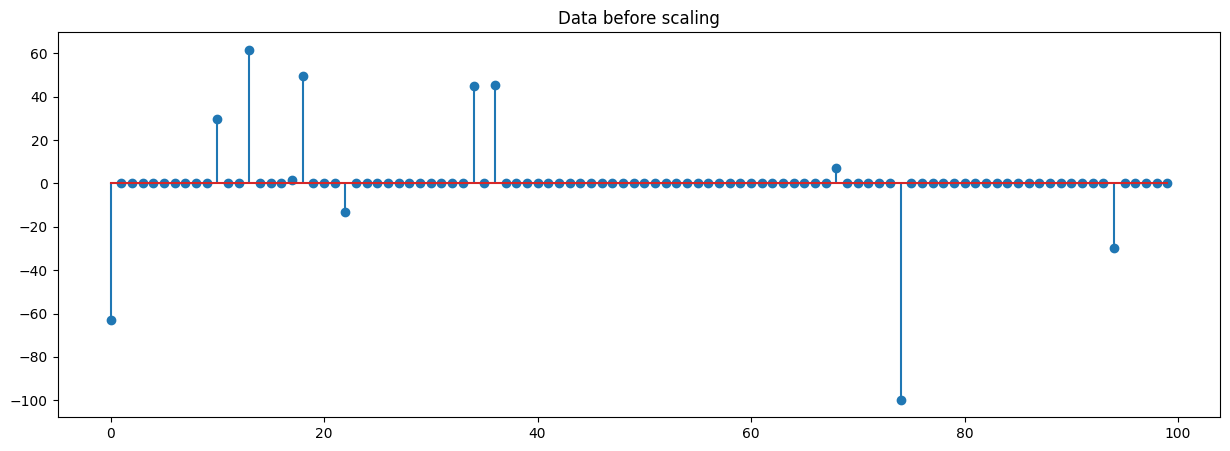

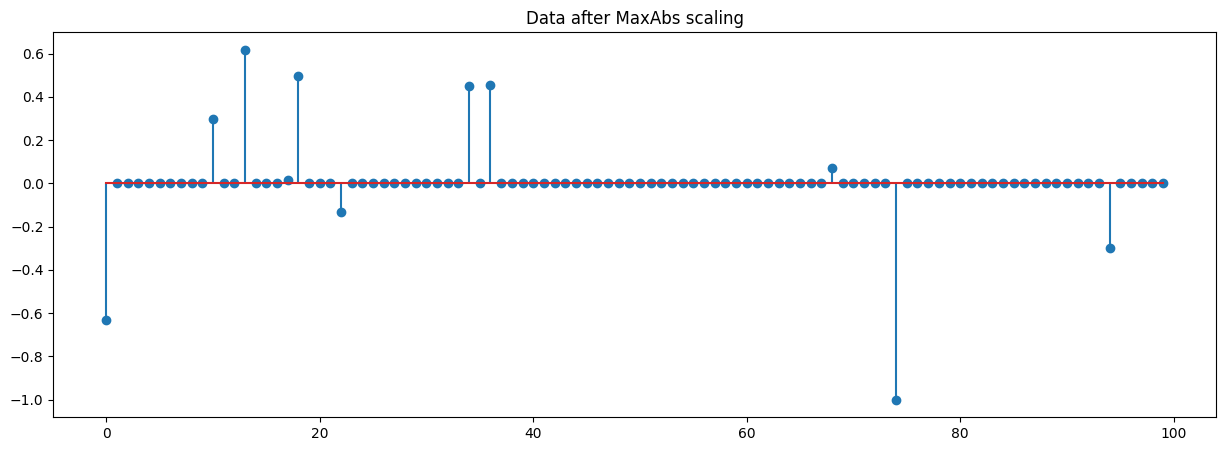

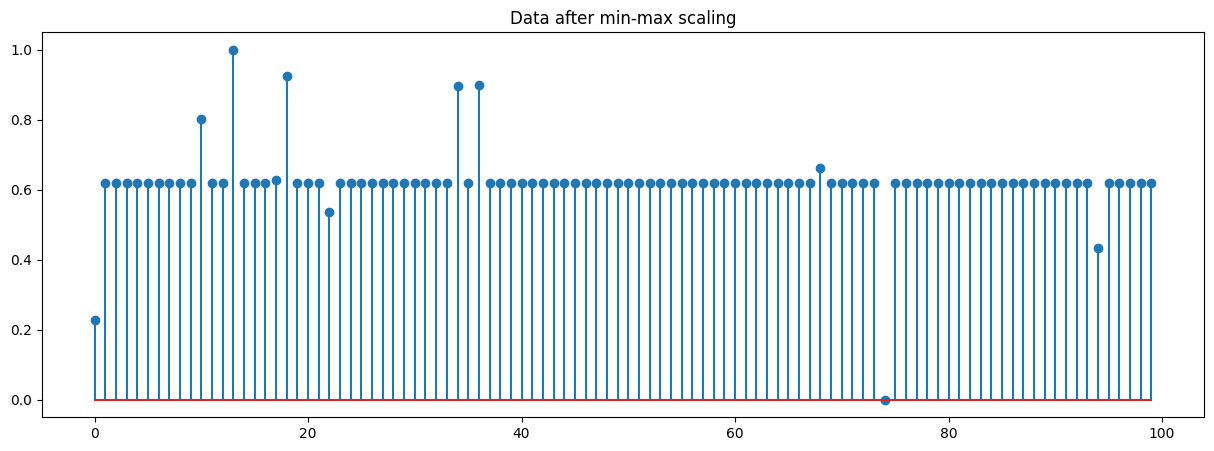

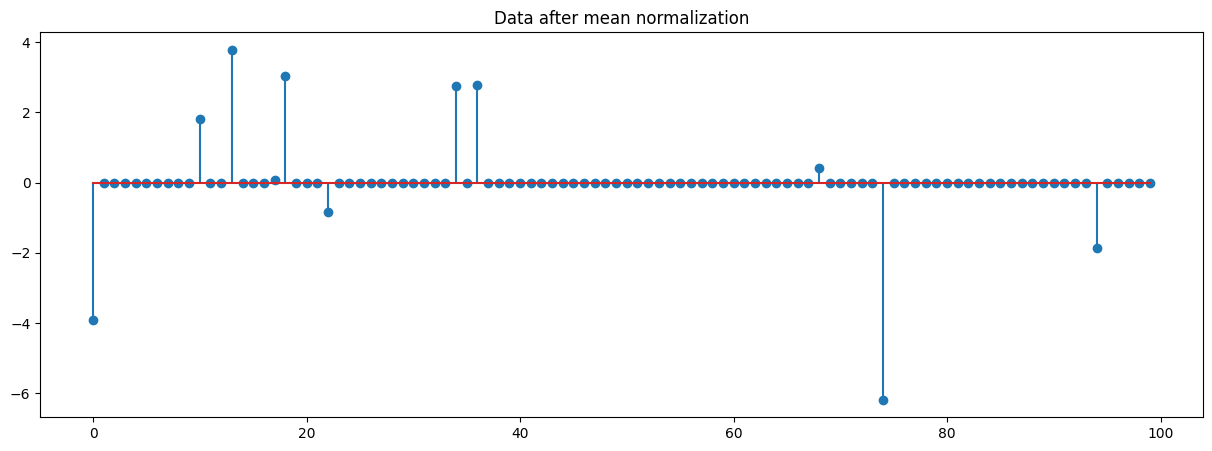

In [12]:
# Plotting the data before scaling
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data before scaling")
plt.stem(signal)

# Plotting the data after scaling
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data after MaxAbs scaling")
plt.stem(scaled_data)

# Plotting the data after min-max scaling
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data after min-max scaling")
plt.stem(scaled_data_min_max)

# Plotting the data after mean normalization
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data after mean normalization")
plt.stem(scaled_data_mean_norm)


### question 05
How many none-zero elements in the data before the normalization and after the
normalization.

In [13]:
# print number of non-zero elements in the signal, scaled_data, scaled_data_min_max, scaled_data_mean_norm
print("Number of non-zero elements in the signal: ", np.count_nonzero(signal))
print("Number of non-zero elements in the scaled_data: ", np.count_nonzero(scaled_data))
print("Number of non-zero elements in the scaled_data_min_max: ", np.count_nonzero(scaled_data_min_max))
print("Number of non-zero elements in the scaled_data_mean_norm: ", np.count_nonzero(scaled_data_mean_norm))


Number of non-zero elements in the signal:  11
Number of non-zero elements in the scaled_data:  11
Number of non-zero elements in the scaled_data_min_max:  99
Number of non-zero elements in the scaled_data_mean_norm:  100


### question 06
Compare how each normalization method scales the data and its impact on structure
of the data.

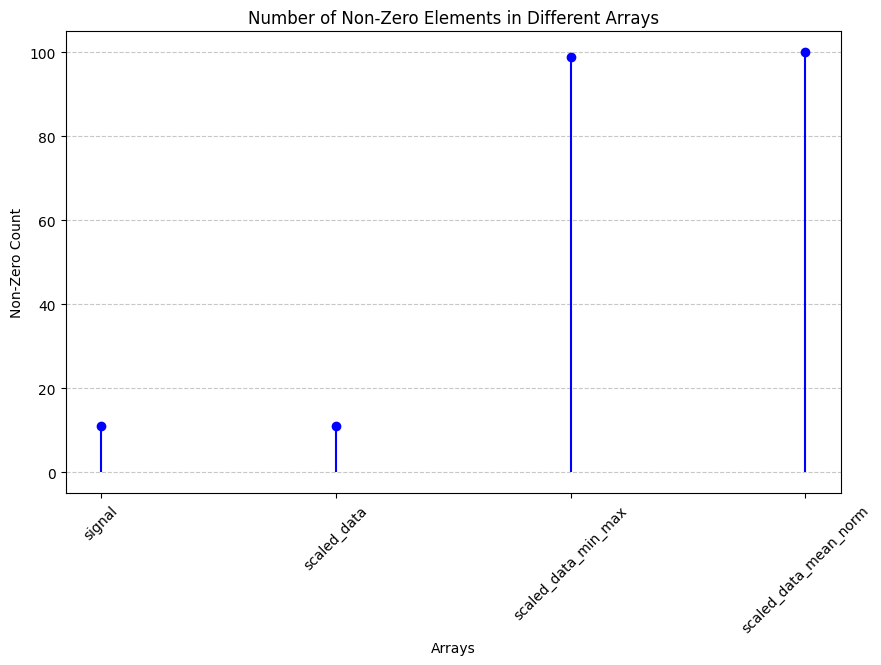

           signal
count  100.000000
mean     0.341755
std     16.272324
min    -99.747313
25%      0.000000
50%      0.000000
75%      0.000000
max     61.570829

       scaled_data_min_max
count           100.000000
mean              0.620445
std               0.100871
min               0.000000
25%               0.618327
50%               0.618327
75%               0.618327
max               1.000000

       scaled_data_mean_norm
count           1.000000e+02
mean            6.591949e-18
std             1.005038e+00
min            -6.181864e+00
25%            -2.110800e-02
50%            -2.110800e-02
75%            -2.110800e-02
max             3.781730e+00

       scaled_data
count   100.000000
mean      0.003426
std       0.163135
min      -1.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       0.617268



In [46]:
#compare the number of non-zero elements in the signal, scaled_data, scaled_data_min_max, scaled_data_mean_norm
import pandas as pd
# Calculate the number of non-zero elements in each array
non_zero_counts = [
    np.count_nonzero(signal),
    np.count_nonzero(scaled_data),
    np.count_nonzero(scaled_data_min_max),
    np.count_nonzero(scaled_data_mean_norm)
]

# Create a DataFrame to store the counts
data = {'Array': ['signal', 'scaled_data', 'scaled_data_min_max', 'scaled_data_mean_norm'],
        'Non-Zero Count': non_zero_counts}
df = pd.DataFrame(data)

# Create a stem plot to compare the number of non-zero elements
plt.figure(figsize=(10, 6))
plt.title("Number of Non-Zero Elements in Different Arrays")
plt.stem(df['Array'], df['Non-Zero Count'], basefmt=" ", markerfmt="bo", linefmt="b-")
plt.xticks(rotation=45)
plt.xlabel("Arrays")
plt.ylabel("Non-Zero Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#analyze the difference between the number of non-zero elements in the signal, scaled_data, scaled_data_min_max, scaled_data_mean_norm
# calculate the mean, std and max of the difference between the number of non-zero elements in the signal, scaled_data, scaled_data_min_max, scaled_data_mean_norm
data_signal = pd.DataFrame(signal)
scaled_data_min_max = pd.DataFrame(scaled_data_min_max)
scaled_data_mean_norm = pd.DataFrame(scaled_data_mean_norm)
scaled_data = pd.DataFrame(scaled_data)
data_signal.columns = ['signal']
scaled_data_min_max.columns = ['scaled_data_min_max']
scaled_data_mean_norm.columns = ['scaled_data_mean_norm']
scaled_data.columns = ['scaled_data']
print(data_signal.describe())
print()
print(scaled_data_min_max.describe())
print()
print(scaled_data_mean_norm.describe())
print()
print(scaled_data.describe())
print()






### question 07
Discuss the effects of each normalization method on the data’s distribution, structure,
and scale. Which normalization approach you recommend for this kind of data and
what is the reason behind this?


-----------------------------
### Linear regression on real world data

1. Load the dataset given in this url. The data illustrates the relationship between
advertising budgets (in thousands of dollars) allocated to TV, radio, and newspaper
media and the corresponding sales (in thousands of units) for a specific product. Use
the code given in listing 3 to load data from CSV

In [22]:
# Load data from CSV
file_path = r'Advertising.csv '
df = pd . read_csv ( file_path )
print ( df . head () )


   sample index     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9


2. Split the data into training and testing sets with 80% of data points for training and
20% of data points for testing.

In [23]:
from sklearn.model_selection import train_test_split

# 'X' is feature matrix and 'y' is target variable
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# The 'test_size' parameter specifies the proportion of data to be allocated to the test set.
# 'random_state' is used to ensure reproducibility; we can choose any integer value.

# Print the dimensions of the training and test sets
print("X_train dimensions: ", X_train.shape)
print("y_train dimensions: ", y_train.shape)
print("X_test dimensions: ", X_test.shape)
print("y_test dimensions: ", y_test.shape)


X_train dimensions:  (160, 3)
y_train dimensions:  (160,)
X_test dimensions:  (40, 3)
y_test dimensions:  (40,)


3. Train a linear regression model and estimate the coefficient corresponds to independent variables (advertising budgets for TV, radio and newspapers).

In [26]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to your training data
model.fit(X_train, y_train)

# Get the coefficients (weights) for each independent variable
coefficients = model.coef_

# Print the coefficients
print("Coefficients:")
print("TV:", coefficients[0])
print("Radio:", coefficients[1])
print("Newspaper:", coefficients[2])

# Optionally, get the intercept (bias) term
intercept = model.intercept_
print("Intercept:", intercept)


Coefficients:
TV: 0.044729517468716326
Radio: 0.18919505423437652
Newspaper: 0.0027611143413671935
Intercept: 2.979067338122629


In this code:

We import the LinearRegression class from scikit-learn.

We create an instance of the linear regression model (model).

We fit the model to your training data using X_train (independent variables) and y_train (dependent variable).

We retrieve the coefficients using model.coef_, which will give you the coefficients corresponding to TV, radio, and newspaper budgets.

We retrieve the intercept (bias) term using model.intercept

The coefficients represent the effect of each advertising budget (TV, radio, newspaper) on the target variable (e.g., sales) in the linear regression model.

When using scikit-learn's LinearRegression from the sklearn.linear_model module, no need to manually add a constant (intercept) to your feature matrix. Scikit-learn automatically includes an intercept term in the linear regression model.

### 4. Evaluate train model on testing data, calculate following statistics for testing and training data.

• Residual sum of squares (RSS)

• Residual Standard Error (RSE)

• Mean Squared Error (MSE)

• R^2 statistic

• Std. Error for each feature

• t-statistic for each feature

• p-value for each feature

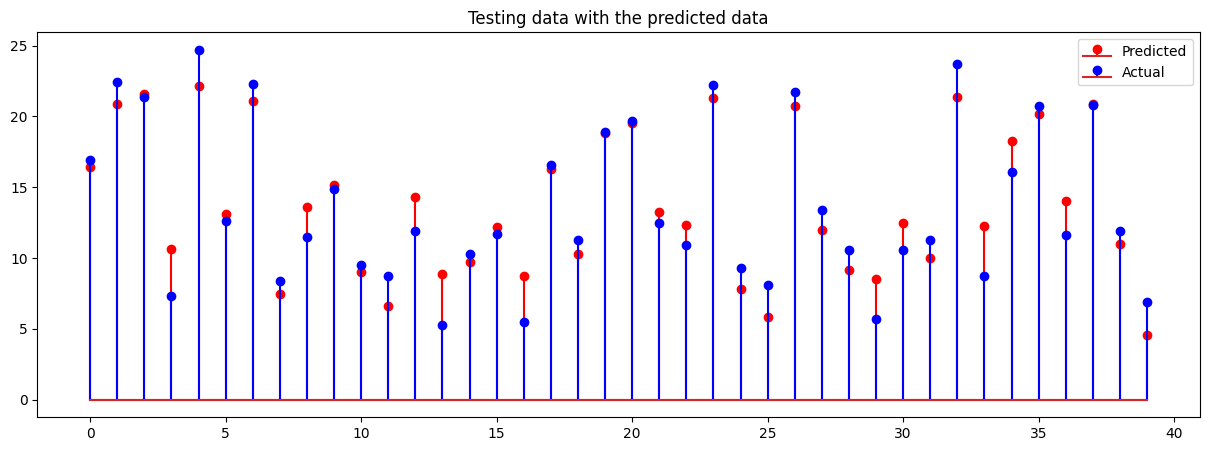

In [29]:
testing = model.predict(X_test)
#plot the testing data with the predicted data
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Testing data with the predicted data")
plt.stem(testing,'r', label='Predicted')
plt.stem(y_test,'b', label='Actual')
plt.legend()
plt.show()


In [33]:
d = X_test.shape[1] # number of features
print("d:", d)
print()
# residual sum of squares (RSS)
RSS = np.sum(np.square(y_test - testing))
print("RSS:", RSS)
print()

# residual standard error (RSE)
RSE = np.sqrt(RSS / (len(y_test) - 4))
print("RSE:", RSE)
print()

# mean squared error (MSE)
MSE = RSS / (len(y_test) - 2)
print("MSE:", MSE)
print()

# r^2 statistic
TSS = np.sum(np.square(y_test - np.mean(y_test)))
r2 = 1 - (RSS / TSS)
print("r^2:", r2)
print()

# std error of the coefficients
std_err = np.sqrt(np.diag(np.linalg.inv(np.dot(X_train.T, X_train))))
print("Standard error of coefficients:")
print("TV:", std_err[0])
print("Radio:", std_err[1])
print("Newspaper:", std_err[2])
print()

# t-statistic
t_stat = coefficients / std_err
print("t-statistic:")
print("TV:", t_stat[0])
print("Radio:", t_stat[1])
print("Newspaper:", t_stat[2])
print()

# p-values
from scipy.stats import t
t_dist = t(len(y_test) - 2)
p_values = (1 - t_dist.cdf(np.abs(t_stat))) * 2
print("p-values:")
print("TV:", p_values[0])
print("Radio:", p_values[1])
print("Newspaper:", p_values[2])
print()

d: 3

RSS: 126.96389415904413

RSE: 1.8779709363435915

MSE: 3.34115510944853

r^2: 0.899438024100912

Standard error of coefficients:
TV: 0.0007271180958166518
Radio: 0.005424195529624446
Newspaper: 0.003955416709697839

t-statistic:
TV: 61.51616597917156
Radio: 34.87983668750153
Newspaper: 0.6980590274085482

p-values:
TV: 0.0
Radio: 0.0
Newspaper: 0.48939013301949563



5. Is there a relationship between advertising budgets and sales?

6. Which independent variable contributes highly on sales?


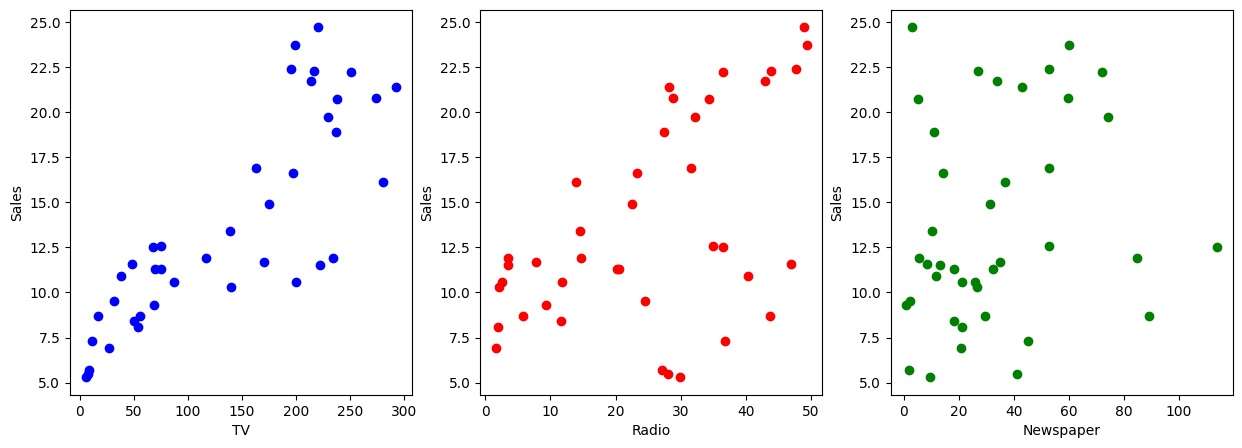

In [35]:
# plot the budget of features vs. sales 
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(X_test['TV'], y_test, color='blue')
axs[0].set_xlabel('TV')
axs[0].set_ylabel('Sales')
axs[1].scatter(X_test['radio'], y_test, color='red')
axs[1].set_xlabel('Radio')
axs[1].set_ylabel('Sales')
axs[2].scatter(X_test['newspaper'], y_test, color='green')
axs[2].set_xlabel('Newspaper')
axs[2].set_ylabel('Sales')
plt.show()





it seems news papers advertiesment is contributes for the sales highly

we can verify it by, the coefficients of the models,

Coefficients:

TV: 0.044729517468716326

Radio: 0.18919505423437652

Newspaper: 0.0027611143413671935

Intercept: 2.979067338122629

when we find the coefficients what we doing is minimizing the cost function, so lower coefficient values will have for highly  contributing features

7. One may argue that possibly, allocating 25,000 dollars both television advertising
and radio advertising individually (i.e., 25,000 dollars for TV and 25,000 dollars for
radio) yields higher sales compared to investing 50,000 dollars in either television
or radio advertising individually. Based on your trained model, comment on this
argument. Here, assume that budged allocated for newspapers is zero.


In [37]:


# Define the scenarios in thousands of dollars
scenario_1 = [25, 25, 0]  # $25,000 allocated to TV, $25,000 to radio, $0 to newspaper
scenario_2 = [50, 0, 0]  # $50,000 allocated to TV, $0 to radio, $0 to newspaper

# Make predictions for each scenario
predicted_sales_1 = model.predict([scenario_1])
predicted_sales_2 = model.predict([scenario_2])


# Convert predicted sales back to actual dollars
predicted_sales_1 *= 1000  # Convert to actual dollars
predicted_sales_2 *= 1000  # Convert to actual dollars


# Compare the predicted sales for each scenario
print("Scenario 1 Predicted Sales ($):", predicted_sales_1)
print("Scenario 2 Predicted Sales ($):", predicted_sales_2)


# Comment on the argument based on the predictions
if predicted_sales_1 > predicted_sales_2:
    print("$25,000 allocated to TV, $25,000 to radio, $0 to newspaper is better.")
else:
    print("$50,000 allocated to TV, $0 to radio, $0 to newspaper is better.")



Scenario 1 Predicted Sales ($): [8827.1816307]
Scenario 2 Predicted Sales ($): [5215.54321156]
$25,000 allocated to TV, $25,000 to radio, $0 to newspaper is better.


c:\python\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\python\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


To evaluate the argument that allocating $25,000 each to television and radio advertising individually yields higher sales compared to investing $50,000 in either television or radio advertising individually, you can use your trained linear regression model to make predictions and compare the predicted sales.

Here are the steps to do this:

Prepare the input data: Create input data points for the scenarios you want to compare. In this case, you have three scenarios:

Scenario 1: $25,000 allocated to TV and $0 allocated to radio.
Scenario 2: $0 allocated to TV and $25,000 allocated to radio.
Scenario 3: $50,000 allocated to either TV or radio (and $0 allocated to the other).
Use your trained model to make predictions: Feed each of these scenarios as input features (X values) into your trained linear regression model to predict sales (the Y value).

Compare the predicted sales: Compare the predicted sales for each scenario to assess which one yields higher sales.

--------------------------
##  Linear regression impact on outliers

1. You are given set of data points related to independent variable (x) and dependent
variable (y) in Table 1.

Use all data given in Table 1 to find a linear regression model. Plot x, y as a scatter
plot and plot your linear regression model in the same scatter plot.


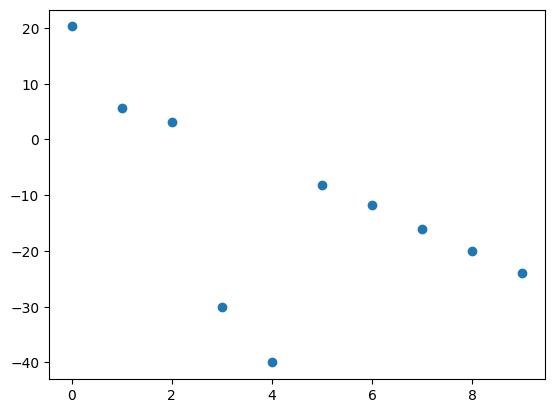

In [38]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = [20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03]
plt.scatter(x, y)

2. Use all data given in Table 1 to find a linear regression model. Plot x, y as a scatter
plot and plot your linear regression model in the same scatter plot.

Intercept: 3.916727272727277
Coefficient: [-3.55727273]


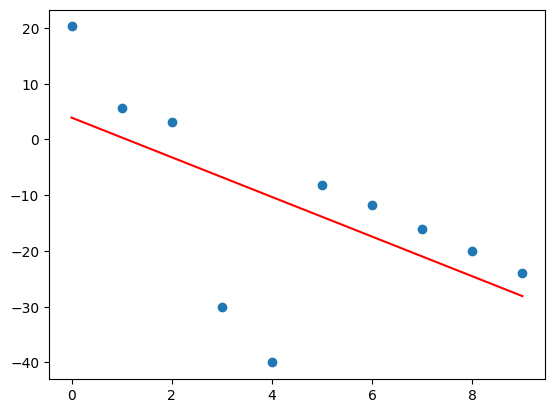

In [40]:
new_model = LinearRegression()
new_model.fit(x.reshape(-1, 1), y)
print("Intercept:", new_model.intercept_)
print("Coefficient:", new_model.coef_)
plt.plot(x, new_model.predict(x.reshape(-1, 1)), color='red')
plt.scatter(x, y)
plt.show()


The code `x.reshape(-1, 1)` is used to reshape a NumPy array `x`. Reshaping an array means changing its dimensions or shape while preserving the total number of elements.

Here's what each part of the code does:

- `x`: This is your original NumPy array that you want to reshape.

- `.reshape(-1, 1)`: This is a method of the NumPy array `x` that specifies the new shape. In this case, it reshapes the array into a two-dimensional array (matrix) with one column. The `-1` in the first dimension indicates that NumPy should automatically calculate the size of that dimension based on the size of the original array and the specified shape of the other dimension(s). The `1` in the second dimension specifies that you want a single column.

Here's an example to illustrate how it works:

```python
import numpy as np

# Create a 1D array with 6 elements
x = np.array([1, 2, 3, 4, 5, 6])

# Reshape the array into a 2D array with one column
x_reshaped = x.reshape(-1, 1)

print("Original array (1D):")
print(x)

print("\nReshaped array (2D with one column):")
print(x_reshaped)
```

Output:
```
Original array (1D):
[1 2 3 4 5 6]

Reshaped array (2D with one column):
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
```

In this example, the original 1D array `x` is reshaped into a 2D array `x_reshaped` with one column. The `-1` in the `reshape` function allows NumPy to automatically determine the number of rows needed to maintain all the elements in the array.

---------------------------
3. You are given two linear models as follows.

• Model 1: y = −4x+12

• Model 2: y = −3.55x+3.91

Here, model 2 is your linear regression model which is learned in task 2.
A robust estimator is introduced to reduce the impact of the outliers. The robust
estimator finds model parameters which minimize the following loss function

In [41]:
def new_loss_reduce_outliers(theta, Beta, x, y, N):
    y_hat = theta[0] + theta[1] * x  # Calculate predicted y values for all data points
    residuals = y - y_hat  
    squared_residuals = residuals**2 
    
    # Calculate the loss for all data points using vectorized operations
    loss = np.sum(squared_residuals / (squared_residuals + Beta)) / N
    
    return loss



------------------------------
4. For the given two models in task 3, calculate the loss function L(θ,β) values for all
data samples using eq. (4) (you may use a computer program to calculate this).

In [42]:
w1 = np.array([12, -4])
w2 = np.array([3.91 , -3.55])

# Calculate the loss for each set of weights
loss1 = new_loss_reduce_outliers(w1, 1, x, y, len(x))
loss2 = new_loss_reduce_outliers(w2, 1, x, y, len(x))

# Print the loss for each set of weights
print("Loss for w1:", loss1)
print("Loss for w2:", loss2)


Loss for w1: 0.435416262490386
Loss for w2: 0.9728470518681676


-----------------------
5. Utilizing this robust estimator, determine the most suitable model from the models
specified in task 3 for the provided dataset. Justify your selection.


loss is lower for the Model 1: y = −4x+12, so it is a better model for the data set

------------------------------
6. How does this robust estimator reduce the impact of the outliers?

A robust estimator reduces the impact of outliers by downweighting or giving less influence to data points that deviate significantly from the majority of the data. This is achieved through various techniques and loss functions that are less sensitive to extreme values compared to traditional least squares estimators. One common robust estimator is the Huber loss, which is less affected by outliers than the mean squared error (MSE) used in ordinary least squares (OLS) regression. Here's how a robust estimator reduces the impact of outliers:

1. **Outlier-Resistant Loss Function:** Robust estimators use loss functions that have a bounded influence on outliers. The loss function is designed to penalize large errors less severely than the squared error loss used in OLS. For example, the Huber loss combines a quadratic loss for small errors and a linear loss for large errors. This means that outliers have less impact on the overall loss.

2. **Weighted Least Squares:** In some robust regression techniques, such as weighted least squares (WLS), data points are assigned different weights. Outliers are assigned lower weights, which means they contribute less to the estimation of model parameters. This downweighting effectively reduces the influence of outliers on the parameter estimates.

3. **Trimming or Winsorizing:** Another approach is to identify and exclude extreme outliers from the analysis. For example, you might trim the top and bottom 5% of data points or apply Winsorization, which caps the extreme values. By doing this, you reduce the impact of outliers on the parameter estimates.

4. **M-Estimation:** Robust estimators often use M-estimation, which is a general method for estimating parameters that minimize a robust objective function. The objective function is chosen to be robust against outliers, making the parameter estimates less sensitive to extreme values.

5. **Robust Residuals:** Some robust estimators use robust residuals, which are less affected by outliers. For example, the weighted residual sum of squares (WRRSS) gives less weight to the residuals associated with outliers, leading to more robust parameter estimates.

6. **Huberization:** Huberization is a technique that combines the advantages of OLS and robust estimation. It uses a hybrid loss function, like the Huber loss, which behaves quadratically for small residuals and linearly for large residuals. This allows the method to be somewhat robust while still leveraging the efficiency of OLS for data points close to the mean.


-----------------------
7. Plot models specified in task 3 and data point to visualize the impact of the outliers.


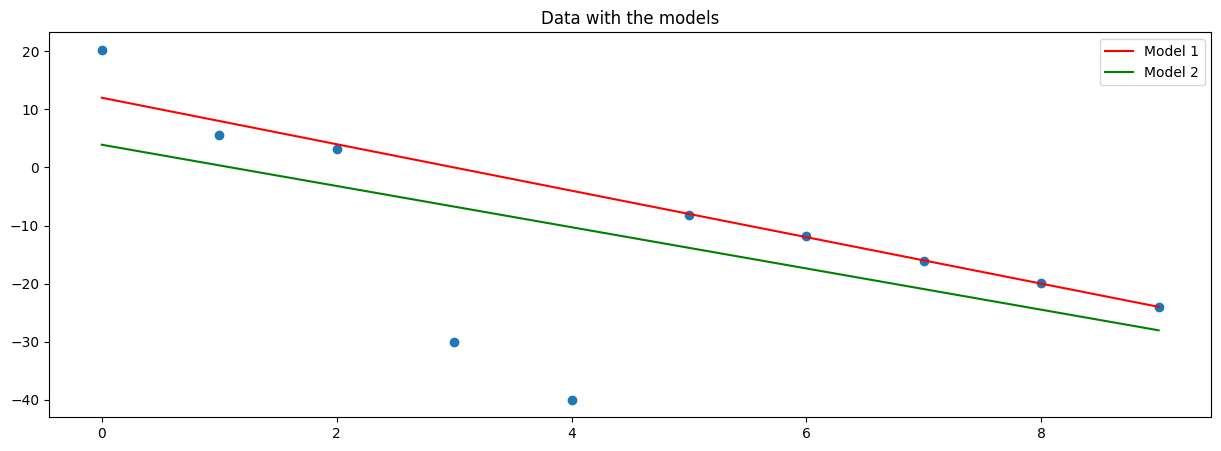

In [45]:
# plot the models with the data
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data with the models")
plt.scatter(x, y)
plt.plot(x, w1[0] + w1[1] * x, color='red', label='Model 1')
plt.plot(x, w2[0] + w2[1] * x, color='green', label='Model 2')
plt.legend()
plt.show()


------------------
8. Briefly discuss the impact on β in eq. (4) to in the context of reducing the impact of
the outliers.




1. **β Helps Downweight Outliers:** The primary purpose of the hyperparameter β is to control the extent to which outliers in the data influence the loss function. In robust regression, outliers can significantly affect the parameter estimates, and β is used to adjust this impact.

2. **Effect of High β:** When β is set to a high value, the loss function becomes similar to the Mean Squared Error (MSE) loss function, which is commonly used in ordinary least squares (OLS) regression. In other words, as β increases, the contribution of the squared difference between the observed (actual) values and the predicted values (residuals) increases. This means that the loss function becomes more sensitive to outliers, similar to the way MSE is.

3. **Effect of Small β:** Conversely, when β is set to a small value, the loss function behaves differently. In this case, the loss function becomes less influenced by the β component, and it mainly relies on the squared difference between observed and predicted values. This can be problematic because it doesn't effectively downweight outliers. The loss function behaves similarly to a standard squared error loss, which is sensitive to outliers.

4. **Choosing an Appropriate β Value:** To effectively downweight outliers and balance the influence of the squared differences and the β component, it is crucial to choose an appropriate value for β based on the nature of the data and the distribution of the residuals. The example provided illustrates that if the squared differences fall within a certain range (e.g., -10 to 10), a specific β value may be suitable. However, if the squared differences are larger (e.g., -100 to 100), a different β value may be more appropriate.

